# Hands On Day 1 


### In class lab WAP : USE CRISP-DM approach to analyse and prepare data for classification modelling

#### Problem statement
The data provided is from a Personal Loans Campaign executed by a bank.Customers were targeted with an offer of Personal Loans at 10% interest rate. The target variable is whether the customer responded to the campaign and availed the personal loan.
Using the dataset perform the following:


Using the dataset, perform 
1. Check out for null values in the dataset.
2. Describe the data and check all the unique paramenters in the columns & range of important numerical variables
3. Calculate the % of responders vs non-responders - comment on whether the data is balanced or imbalanced
4. Analyse how the  % of responders vary by - Gender, Occupation
5. Build a demographic profile of the banks's customers describing their age range, gender distribution and occupation
6. Analyse how the following factors vary with the target variable:
   * Age
   * Balance
   * LEN_OF_REL
7. Come up with other variables that you think might impact a response from a customer and analyse how they change with the target variable.
8. What model performance measures will you use to evaluate the model - explain the rationale
9. Perform logistic regression to predict if a customer will respond to the campaign and identify the variables that influence the target variable
10. Interpret the logistic regression model summary using Odds ratio

   

### Data Dictionary

In [1]:
import pandas as pd
dict = pd.read_csv('PL_XSELL_METADATA.csv')
dict

,Column Name,Description
0,CUST_ID,Customer ID - Unique ID
1,TARGET,"Target Field - 1: Responder, 0: Non-Responder"
2,AGE,Age of the customer in years
3,GENDER,Gender
4,BALANCE,Average Monthly Balance
5,OCCUPATION,Occupation
6,SCR,Generic Marketing Score
7,HOLDING_PERIOD,Ability to hold money in the account (Range 0 ...
8,ACC_TYPE,Account Type - Saving / Current
9,ACC_OP_DATE,Account Open Date


In [1]:
#Import all the useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
#Read the csv file
df = pd.read_csv('PL_XSELL2.csv')

In [3]:
#Get the column names
df.columns

Index(['CUST_ID', 'TARGET', 'AGE', 'GENDER', 'BALANCE', 'OCCUPATION', 'SCR',
       'HOLDING_PERIOD', 'ACC_TYPE', 'LEN_OF_REL', 'NO_OF_L_CR_TXNS',
       'NO_OF_L_DR_TXNS', 'TOT_NO_OF_L_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS',
       'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS', 'NO_OF_MOB_DR_TXNS',
       'NO_OF_CHQ_DR_TXNS', 'FLG_HAS_CC', 'AMT_ATM_DR', 'AMT_BR_CSH_WDL_DR',
       'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_MOB_DR', 'AMT_L_DR',
       'FLG_HAS_ANY_CHGS', 'AMT_OTH_BK_ATM_USG_CHGS', 'AMT_MIN_BAL_NMC_CHGS',
       'NO_OF_IW_CHQ_BNC_TXNS', 'NO_OF_OW_CHQ_BNC_TXNS', 'AVG_AMT_PER_ATM_TXN',
       'AVG_AMT_PER_CSH_WDL_TXN', 'AVG_AMT_PER_CHQ_TXN', 'AVG_AMT_PER_NET_TXN',
       'AVG_AMT_PER_MOB_TXN', 'FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN', 'random'],
      dtype='object')

In [4]:
#Fetch the number of rows and columns
print ('DataFrame Shape', df.shape)

DataFrame Shape (20000, 38)


In [5]:
#View the top 3 rows of data
df.head(3)

,CUST_ID,TARGET,AGE,GENDER,BALANCE,OCCUPATION,SCR,HOLDING_PERIOD,ACC_TYPE,LEN_OF_REL,...,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,random
0,C7927,0,27,M,3383.75,SELF_EMP,776,30,SA,146,...,0,0,13100.0,0.0,0.0,486778.5,0.0,1,1,0.000011
1,C6877,0,47,M,287489.04,SAL,324,28,SA,104,...,0,0,6600.0,0.0,0.0,799813.0,0.0,1,0,0.000111
2,C19922,0,40,M,18216.88,SELF_EMP,603,2,SA,61,...,0,1,11200.0,561120.0,24660.0,997570.0,0.0,1,1,0.000120


In [6]:
#Get info about datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 38 columns):
CUST_ID                     20000 non-null object
TARGET                      20000 non-null int64
AGE                         20000 non-null int64
GENDER                      20000 non-null object
BALANCE                     20000 non-null float64
OCCUPATION                  20000 non-null object
SCR                         20000 non-null int64
HOLDING_PERIOD              20000 non-null int64
ACC_TYPE                    20000 non-null object
LEN_OF_REL                  20000 non-null int64
NO_OF_L_CR_TXNS             20000 non-null int64
NO_OF_L_DR_TXNS             20000 non-null int64
TOT_NO_OF_L_TXNS            20000 non-null int64
NO_OF_BR_CSH_WDL_DR_TXNS    20000 non-null int64
NO_OF_ATM_DR_TXNS           20000 non-null int64
NO_OF_NET_DR_TXNS           20000 non-null int64
NO_OF_MOB_DR_TXNS           20000 non-null int64
NO_OF_CHQ_DR_TXNS           20000 non-null int64
FLG

In [7]:
#Convert relevant columns to categorical variable
df['TARGET'] = df['TARGET'].astype('category')
df['FLG_HAS_CC'] = df['FLG_HAS_CC'].astype('category')
df['FLG_HAS_ANY_CHGS'] = df['FLG_HAS_ANY_CHGS'].astype('category')  
df['FLG_HAS_NOMINEE'] = df['FLG_HAS_NOMINEE'].astype('category')
df['FLG_HAS_OLD_LOAN'] = df['FLG_HAS_OLD_LOAN'].astype('category')

#Get info about datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 38 columns):
CUST_ID                     20000 non-null object
TARGET                      20000 non-null category
AGE                         20000 non-null int64
GENDER                      20000 non-null object
BALANCE                     20000 non-null float64
OCCUPATION                  20000 non-null object
SCR                         20000 non-null int64
HOLDING_PERIOD              20000 non-null int64
ACC_TYPE                    20000 non-null object
LEN_OF_REL                  20000 non-null int64
NO_OF_L_CR_TXNS             20000 non-null int64
NO_OF_L_DR_TXNS             20000 non-null int64
TOT_NO_OF_L_TXNS            20000 non-null int64
NO_OF_BR_CSH_WDL_DR_TXNS    20000 non-null int64
NO_OF_ATM_DR_TXNS           20000 non-null int64
NO_OF_NET_DR_TXNS           20000 non-null int64
NO_OF_MOB_DR_TXNS           20000 non-null int64
NO_OF_CHQ_DR_TXNS           20000 non-null int64


In [8]:
#Obtain summary of columns with numerical data
df.describe()

,AGE,BALANCE,SCR,HOLDING_PERIOD,LEN_OF_REL,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,...,AMT_OTH_BK_ATM_USG_CHGS,AMT_MIN_BAL_NMC_CHGS,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,random
count,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.00000,20000.000000,20000.000000,...,20000.00000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,38.418150,5.113622e+05,440.150300,14.955650,125.239300,12.348050,6.63370,18.97540,1.883000,1.028950,...,1.09950,1.292000,0.042750,0.04440,7408.839731,242236.478811,25092.478384,179059.029254,20303.920406,0.501933
std,9.577985,7.235930e+05,249.887582,8.642634,54.953936,12.151921,7.67583,17.75929,2.263596,1.497239,...,14.21922,14.764201,0.203038,0.20623,7210.168619,269837.890598,49387.197536,281706.855583,46472.889982,0.290762
min,21.000000,0.000000e+00,100.000000,1.000000,29.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000011
25%,30.000000,6.475403e+04,227.000000,7.000000,79.000000,6.000000,2.00000,9.00000,1.000000,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.000000,1265.450000,0.000000,0.000000,0.000000,0.248187
50%,38.000000,2.316758e+05,364.000000,15.000000,125.000000,10.000000,5.00000,14.00000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.00000,6000.000000,147095.000000,8645.000000,0.000000,0.000000,0.506121
75%,46.000000,6.538768e+05,644.000000,22.000000,172.000000,14.000000,7.00000,21.00000,2.000000,1.000000,...,0.00000,0.000000,0.000000,0.00000,13500.000000,385000.000000,28605.000000,257699.000000,0.000000,0.753571
max,55.000000,8.360431e+06,999.000000,31.000000,221.000000,75.000000,74.00000,149.00000,15.000000,25.000000,...,250.00000,170.000000,2.000000,2.00000,25000.000000,999640.000000,537842.220000,999854.000000,199667.000000,0.999947


### Phase #3 Data Preparation


Performing some data cleaning, validation, and sanity checks before performing any analysis

In [9]:
df.columns

Index(['CUST_ID', 'TARGET', 'AGE', 'GENDER', 'BALANCE', 'OCCUPATION', 'SCR',
       'HOLDING_PERIOD', 'ACC_TYPE', 'LEN_OF_REL', 'NO_OF_L_CR_TXNS',
       'NO_OF_L_DR_TXNS', 'TOT_NO_OF_L_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS',
       'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS', 'NO_OF_MOB_DR_TXNS',
       'NO_OF_CHQ_DR_TXNS', 'FLG_HAS_CC', 'AMT_ATM_DR', 'AMT_BR_CSH_WDL_DR',
       'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_MOB_DR', 'AMT_L_DR',
       'FLG_HAS_ANY_CHGS', 'AMT_OTH_BK_ATM_USG_CHGS', 'AMT_MIN_BAL_NMC_CHGS',
       'NO_OF_IW_CHQ_BNC_TXNS', 'NO_OF_OW_CHQ_BNC_TXNS', 'AVG_AMT_PER_ATM_TXN',
       'AVG_AMT_PER_CSH_WDL_TXN', 'AVG_AMT_PER_CHQ_TXN', 'AVG_AMT_PER_NET_TXN',
       'AVG_AMT_PER_MOB_TXN', 'FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN', 'random'],
      dtype='object')

In [10]:
#Drop redundant columns
df = df.drop(['CUST_ID'], axis=1) 

#### Missing Data

In [11]:
### Checking for missing values
df.isnull().sum()

TARGET                      0
AGE                         0
GENDER                      0
BALANCE                     0
OCCUPATION                  0
SCR                         0
HOLDING_PERIOD              0
ACC_TYPE                    0
LEN_OF_REL                  0
NO_OF_L_CR_TXNS             0
NO_OF_L_DR_TXNS             0
TOT_NO_OF_L_TXNS            0
NO_OF_BR_CSH_WDL_DR_TXNS    0
NO_OF_ATM_DR_TXNS           0
NO_OF_NET_DR_TXNS           0
NO_OF_MOB_DR_TXNS           0
NO_OF_CHQ_DR_TXNS           0
FLG_HAS_CC                  0
AMT_ATM_DR                  0
AMT_BR_CSH_WDL_DR           0
AMT_CHQ_DR                  0
AMT_NET_DR                  0
AMT_MOB_DR                  0
AMT_L_DR                    0
FLG_HAS_ANY_CHGS            0
AMT_OTH_BK_ATM_USG_CHGS     0
AMT_MIN_BAL_NMC_CHGS        0
NO_OF_IW_CHQ_BNC_TXNS       0
NO_OF_OW_CHQ_BNC_TXNS       0
AVG_AMT_PER_ATM_TXN         0
AVG_AMT_PER_CSH_WDL_TXN     0
AVG_AMT_PER_CHQ_TXN         0
AVG_AMT_PER_NET_TXN         0
AVG_AMT_PE

No missing data

In [12]:
#Sort customers from oldest to newest
df.sort_values(by='LEN_OF_REL', ascending=False).head(5)

,TARGET,AGE,GENDER,BALANCE,OCCUPATION,SCR,HOLDING_PERIOD,ACC_TYPE,LEN_OF_REL,NO_OF_L_CR_TXNS,...,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,random
14312,0,28,M,5361.08,SENP,953,1,SA,221,4,...,0,0,0.0,306260.0,30250.00,0.00,0.0,1,1,0.720510
15435,1,43,F,746947.24,PROF,454,23,SA,221,14,...,0,0,15050.0,60850.0,0.00,0.00,194939.0,1,0,0.774421
8247,0,54,M,108298.87,SELF_EMP,243,20,CA,221,12,...,0,0,2950.0,27840.0,23688.33,84591.75,93081.0,1,1,0.417035
16853,0,46,M,374185.26,PROF,452,30,SA,221,1,...,0,0,0.0,499600.0,96650.00,0.00,0.0,1,0,0.845648
9975,0,49,F,656555.45,SENP,257,24,SA,221,2,...,0,0,0.0,714390.0,0.00,0.00,0.0,0,1,0.504633


#### Outliers and Distributions

To get a good understanding of the questions that are being asked, it may be necessary to remove projects with very small and large project goal's

In [13]:
figsize = (18,6)

def histogram_plot(dataset, column, x_label, title):
    '''
    Plots histogram of input feature
    
    INPUT
    dataset = dataset with feature that is to be plotted
    column = feature of dataset to be plotted
    x_label = Label title of the x axis
    title = Plot figure title
    
    OUTPUT
    Distribution plot
    '''
    plt.figure(figsize=figsize);
    plt.hist(data = dataset, x = column, bins = 20);
    plt.xlabel(x_label);
    plt.grid(False)
    plt.title(title)

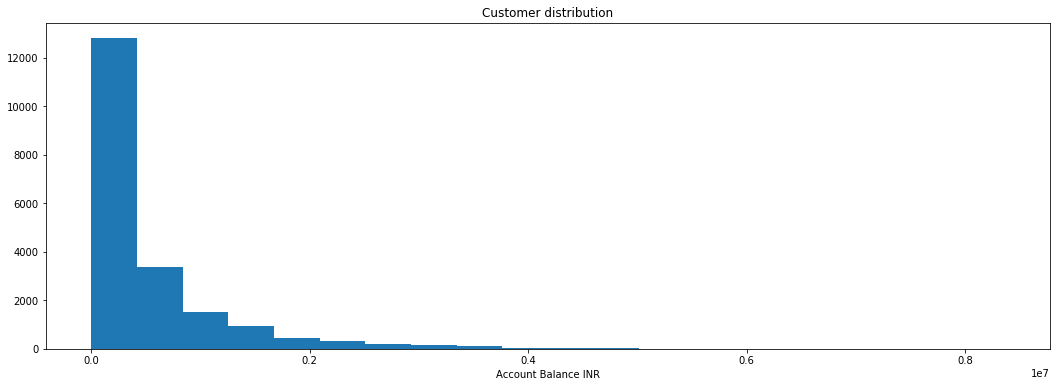

In [14]:
##distribution of account balance


histogram_plot(df, 'BALANCE', 'Account Balance INR', 'Customer distribution')

It is an extremely left skewed distribtuion

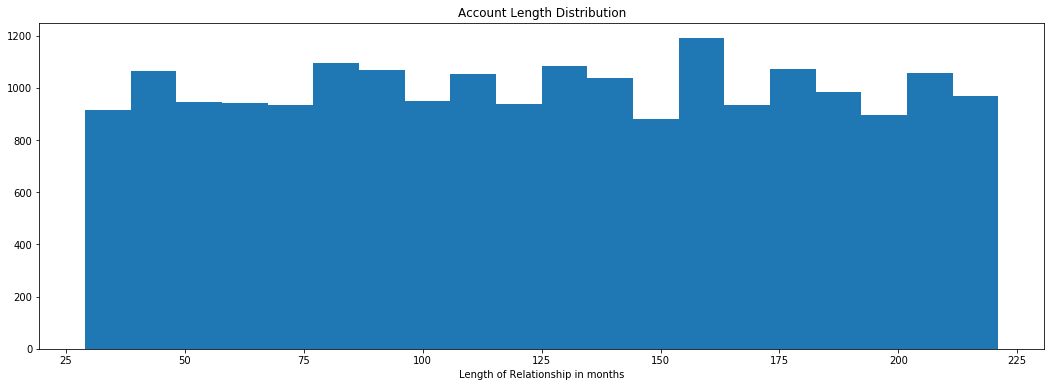

In [15]:
###Project Length Distribution

figsize = (18,6)


histogram_plot(df, 'LEN_OF_REL', 'Length of Relationship in months', 'Account Length Distribution')

The distribution is uniform

## Analysis - Finding Answers

### Calculate the % of responders vs non-responders - comment on whether the data is balanced or imbalanced

In [16]:
print ('Unique Categories of Target: ',df.TARGET.nunique())

Unique Categories of Target:  2


#### % of positive response = # of projects with TARGET=1 / total rows

In [17]:
# % of positive & negative responses in the Y variable
df.TARGET.value_counts()/(len(df))*100

0    87.44
1    12.56
Name: TARGET, dtype: float64

### Analyse how the % of responders vary by - Gender

In [18]:
gender_perc = round(pd.crosstab(df.TARGET, df.GENDER, normalize='columns'),2)
gender_perc

GENDER,F,M
TARGET,,
0,0.9,0.87
1,0.1,0.13


### Response is higher for Men compared to Women

### Analyse how the  % of responders vary by - Occupation

In [19]:
occ_perc = round(pd.crosstab(df.TARGET, df.OCCUPATION, normalize='columns'),2)
occ_perc

OCCUPATION,PROF,SAL,SELF_EMP,SENP
TARGET,,,,
0,0.88,0.9,0.8,0.89
1,0.12,0.1,0.2,0.11


#### Response is highest for Self employed

## Build a demographic profile of the banks's customers describing their age range, gender distribution and occupation


In [20]:
print(df.AGE.describe())
print(df.OCCUPATION.value_counts())
print(df.GENDER.value_counts())

count    20000.000000
mean        38.418150
std          9.577985
min         21.000000
25%         30.000000
50%         38.000000
75%         46.000000
max         55.000000
Name: AGE, dtype: float64
SAL         5855
PROF        5417
SENP        5160
SELF_EMP    3568
Name: OCCUPATION, dtype: int64
M    14376
F     5624
Name: GENDER, dtype: int64


### Analyse how the following factors vary with the target variable:
   * Age
   * Balance
   * LEN_OF_REL

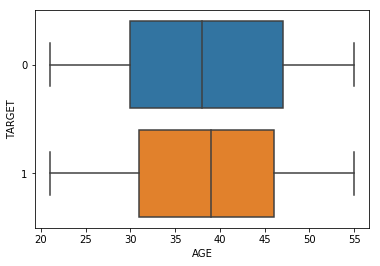

In [21]:
### AGE vs TARGET
sns.boxplot(x="AGE", y="TARGET", data=df)

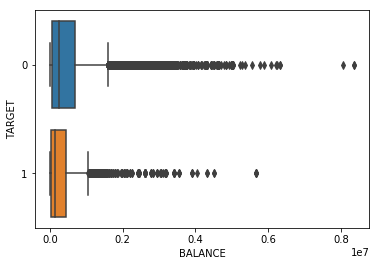

In [22]:
### BALANCE vs TARGET
sns.boxplot(x="BALANCE", y="TARGET", data=df)

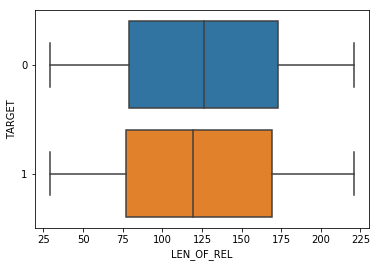

In [23]:
### LEN OF REL vs TARGET
sns.boxplot(x="LEN_OF_REL", y="TARGET", data=df)

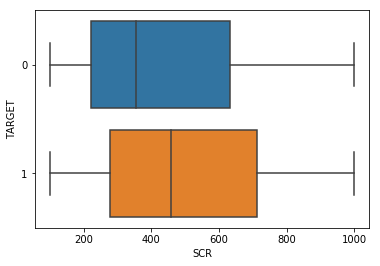

In [24]:
#SCR vs target
### SCR vs TARGET
sns.boxplot(x="SCR", y="TARGET", data=df)

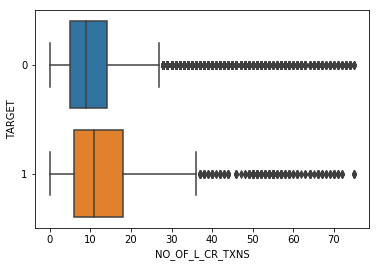

In [25]:
sns.boxplot(x="NO_OF_L_CR_TXNS", y="TARGET", data=df)

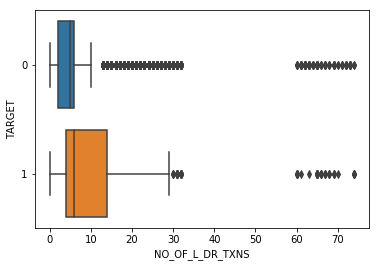

In [26]:
sns.boxplot(x="NO_OF_L_DR_TXNS", y="TARGET", data=df)

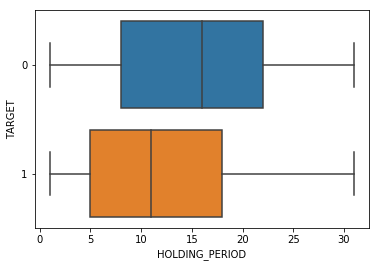

In [27]:
#Ability to hold money in the account 
sns.boxplot(x="HOLDING_PERIOD", y="TARGET", data=df)


In [28]:
acc_perc = round(pd.crosstab(df.TARGET, df.ACC_TYPE, normalize='columns'),2)
acc_perc

ACC_TYPE,CA,SA
TARGET,,
0,0.83,0.89
1,0.17,0.11


In [29]:
flag_perc = round(pd.crosstab(df.TARGET, df.FLG_HAS_CC, normalize='columns'),2)
flag_perc

FLG_HAS_CC,0,1
TARGET,,
0,0.9,0.82
1,0.1,0.18


In [30]:
flag1_perc = round(pd.crosstab(df.TARGET, df.FLG_HAS_ANY_CHGS, normalize='columns'),2)
flag1_perc

FLG_HAS_ANY_CHGS,0,1
TARGET,,
0,0.88,0.83
1,0.12,0.17


### Perform logistic regression to predict if a customer will respond to the campaign and identify the variables that influence the target variable

In [31]:
model_df = df.copy()

In [32]:
model_df['TARGET'].value_counts()

0    17488
1     2512
Name: TARGET, dtype: int64

In [33]:
model_df.columns

Index(['TARGET', 'AGE', 'GENDER', 'BALANCE', 'OCCUPATION', 'SCR',
       'HOLDING_PERIOD', 'ACC_TYPE', 'LEN_OF_REL', 'NO_OF_L_CR_TXNS',
       'NO_OF_L_DR_TXNS', 'TOT_NO_OF_L_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS',
       'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS', 'NO_OF_MOB_DR_TXNS',
       'NO_OF_CHQ_DR_TXNS', 'FLG_HAS_CC', 'AMT_ATM_DR', 'AMT_BR_CSH_WDL_DR',
       'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_MOB_DR', 'AMT_L_DR',
       'FLG_HAS_ANY_CHGS', 'AMT_OTH_BK_ATM_USG_CHGS', 'AMT_MIN_BAL_NMC_CHGS',
       'NO_OF_IW_CHQ_BNC_TXNS', 'NO_OF_OW_CHQ_BNC_TXNS', 'AVG_AMT_PER_ATM_TXN',
       'AVG_AMT_PER_CSH_WDL_TXN', 'AVG_AMT_PER_CHQ_TXN', 'AVG_AMT_PER_NET_TXN',
       'AVG_AMT_PER_MOB_TXN', 'FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN', 'random'],
      dtype='object')

In [34]:
#Drop variables with near zero variance
threshold = 0.01

model_df = model_df.drop(model_df.std()[model_df.std() < threshold].index.values, axis=1)
print(model_df.shape)

(20000, 37)


In [35]:
#Find highly correlated columns
#Create a subset of numerical variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = model_df.select_dtypes(include=numerics)

In [36]:
#Function to get top absolute correlations
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(newdf, 10))

Top Absolute Correlations
AMT_MOB_DR         AVG_AMT_PER_MOB_TXN        0.964198
NO_OF_L_CR_TXNS    TOT_NO_OF_L_TXNS           0.936226
NO_OF_L_DR_TXNS    NO_OF_NET_DR_TXNS          0.915082
AMT_CHQ_DR         AVG_AMT_PER_CHQ_TXN        0.904118
AMT_NET_DR         AVG_AMT_PER_NET_TXN        0.856792
NO_OF_ATM_DR_TXNS  AMT_OTH_BK_ATM_USG_CHGS    0.840978
NO_OF_L_DR_TXNS    TOT_NO_OF_L_TXNS           0.831203
                   NO_OF_ATM_DR_TXNS          0.806728
NO_OF_MOB_DR_TXNS  AMT_OTH_BK_ATM_USG_CHGS    0.805864
AMT_BR_CSH_WDL_DR  AVG_AMT_PER_CSH_WDL_TXN    0.776706
dtype: float64


In [37]:
#delete certain columns before model building
model_df = model_df.drop(['AMT_L_DR',"AVG_AMT_PER_ATM_TXN"], axis=1)

Preprocessing Data

In [38]:
#X and Y variables
X  =  model_df.drop(['TARGET'], axis=1)
y  =  model_df[['TARGET']]

print(X.shape)
print(y.shape)

(20000, 34)
(20000, 1)


In [39]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [40]:
X.head()

,AGE,BALANCE,SCR,HOLDING_PERIOD,LEN_OF_REL,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,...,random,GENDER_M,OCCUPATION_SAL,OCCUPATION_SELF_EMP,OCCUPATION_SENP,ACC_TYPE_SA,FLG_HAS_CC_1,FLG_HAS_ANY_CHGS_1,FLG_HAS_NOMINEE_1,FLG_HAS_OLD_LOAN_1
0,27,3383.75,776,30,146,7,3,10,0,1,...,0.000011,1,0,1,0,1,0,0,1,1
1,47,287489.04,324,28,104,8,2,10,0,1,...,0.000111,1,1,0,0,1,0,1,1,0
2,40,18216.88,603,2,61,10,5,15,1,1,...,0.000120,1,0,1,0,1,0,1,1,1
3,53,71720.48,196,13,107,36,14,50,4,2,...,0.000137,1,1,0,0,0,0,0,1,0
4,36,1671622.89,167,24,185,20,1,21,1,0,...,0.000174,1,0,0,0,1,0,0,1,0


In [41]:
##Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(14000, 36) (14000, 1)
(6000, 36) (6000, 1)


In [42]:
#Logistic regression using stats model
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()

         Current function value: 0.330133
         Iterations: 35


C:\Users\vharsheny\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [43]:
#Summary of logistic regression
lg.summary()

C:\Users\vharsheny\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\vharsheny\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\vharsheny\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\vharsheny\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 TARGET   No. Observations:                14000
Model:                          Logit   Df Residuals:                    13964
Method:                           MLE   Df Model:                           35
Date:                Wed, 02 Dec 2020   Pseudo R-squ.:                  0.1136
Time:                        12:14:57   Log-Likelihood:                -4621.9
converged:                      False   LL-Null:                       -5214.1
                                        LLR p-value:                4.017e-226
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.4535      0.227    -10.793      0.000      -2.899      -2.008
AGE                          0.0010      0.003      0.326      0.745      -0.005       0.007
BALANCE                  -2.158e-07   4.68e-08     -4.611      0.000   -3.07e-07   -1.24e-07
SCR                          0.0008      0.000      7.566      0.000       0.001       0.001
HOLDING_PERIOD              -0.0472      0.004    -11.885      0.000      -0.055      -0.039
LEN_OF_REL                  -0.0013      0.000     -2.675      0.007      -0.002      -0.000
NO_OF_L_CR_TXNS             26.2996   2.15e+04      0.001      0.999    -4.2e+04    4.21e+04
NO_OF_L_DR_TXNS             21.8994        nan        nan        nan         nan         nan
TOT_NO_OF_L_TXNS           -26.2778   2.15e+04     -0.001      0.999   -4.21e+04    4.21e+04
NO_OF_BR_CSH_WDL_DR_TXNS     4.3851        nan        nan        nan         nan         nan
NO_OF_ATM_DR_TXNS            4.3258        nan        nan        nan         nan         nan
NO_OF_NET_DR_TXNS            4.4066        nan        nan        nan         nan         nan
NO_OF_MOB_DR_TXNS            4.3496        nan        nan        nan         nan         nan
NO_OF_CHQ_DR_TXNS            4.4203        nan        nan        nan         nan         nan
AMT_ATM_DR                2.691e-06   2.48e-06      1.085      0.278   -2.17e-06    7.55e-06
AMT_BR_CSH_WDL_DR         2.999e-07   1.62e-07      1.847      0.065   -1.84e-08    6.18e-07
AMT_CHQ_DR                7.082e-09   1.42e-07      0.050      0.960    -2.7e-07    2.84e-07
AMT_NET_DR               -5.011e-07   2.41e-07     -2.080      0.038   -9.73e-07   -2.89e-08
AMT_MOB_DR                1.474e-07    2.6e-06      0.057      0.955   -4.94e-06    5.24e-06
AMT_OTH_BK_ATM_USG_CHGS      0.0011      0.006      0.193      0.847      -0.010       0.012
AMT_MIN_BAL_NMC_CHGS        -0.0040      0.002     -2.057      0.040      -0.008      -0.000
NO_OF_IW_CHQ_BNC_TXNS       -0.0484      0.139     -0.348      0.728      -0.321       0.225
NO_OF_OW_CHQ_BNC_TXNS       -0.0757      0.136     -0.557      0.578      -0.342       0.191
AVG_AMT_PER_CSH_WDL_TXN  -1.314e-07   1.98e-07     -0.664      0.507   -5.19e-07    2.57e-07
AVG_AMT_PER_CHQ_TXN      -6.118e-07    1.3e-06     -0.469      0.639   -3.17e-06    1.94e-06
AVG_AMT_PER_NET_TXN       8.095e-07   2.49e-07      3.246      0.001    3.21e-07     1.3e-06
AVG_AMT_PER_MOB_TXN       1.982e-06   2.58e-06      0.769      0.442   -3.07e-06    7.03e-06
random                      -0.0289      0.093     -0.310      0.756      -0.212       0.154
GENDER_M                     0.1912      0.066      2.903      0.004       0.062       0.320
OCCUPATION_SAL              -0.3146      0.076     -4.116      0.000      -0.464      -0.165
OCCUPATION_SELF_EMP          0.6376      0.075      8.499      0.000       0.491       0.785
OCCUPATION_SENP             -0.1009      0.079     -1.272      0.203      -0.25

In [44]:
#Calculate Odds Ratio
#Calculate Odds Ratio
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format
lgcoef
lgcoef.to_csv('logit_handson.csv')

In [45]:
lgcoef

,coef,Odds_ratio,pval
const,-2.45,0.09,0.00
AGE,0.00,1.00,0.74
BALANCE,-0.00,1.00,0.00
SCR,0.00,1.00,0.00
HOLDING_PERIOD,-0.05,0.95,0.00
LEN_OF_REL,-0.00,1.00,0.01
NO_OF_L_CR_TXNS,26.30,264096577042.29,1.00
NO_OF_L_DR_TXNS,21.90,3241669229.14,nan
TOT_NO_OF_L_TXNS,-26.28,0.00,1.00
NO_OF_BR_CSH_WDL_DR_TXNS,4.39,80.25,nan


In [46]:
#Calculate Odds Ratio
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format
lgcoef

lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.05
lgcoef[pval_filter]


,coef,Odds_ratio,probability,pval
FLG_HAS_CC_1,0.64,1.89,0.65,0.00
OCCUPATION_SELF_EMP,0.64,1.89,0.65,0.00
FLG_HAS_ANY_CHGS_1,0.28,1.33,0.57,0.01
GENDER_M,0.19,1.21,0.55,0.00
SCR,0.00,1.00,0.50,0.00
AVG_AMT_PER_NET_TXN,0.00,1.00,0.50,0.00
BALANCE,-0.00,1.00,0.50,0.00
AMT_NET_DR,-0.00,1.00,0.50,0.04
LEN_OF_REL,-0.00,1.00,0.50,0.01
AMT_MIN_BAL_NMC_CHGS,-0.00,1.00,0.50,0.04
